# Modulador de reactancia de FM.
 
    
La figura  muestra un diagrama esquemático para un modulador de reactancia usando un JFET como el dispositivo activo. 

![ex 2.13](fig/FETreactancia.png)

Esta configuración del circuito se llama modulador de reactancia porque el JFET observa como una carga de reactancia variable al circuito tanque $LC$. 
La señal modulante varía en la reactancia de $Q_1$, lo cual causa un cambio correspondiente en la frecuencia resonante del circuito tanque del oscilador.
El capacitor $C$ que está en serie con el resistor $R$ de compuerta, tiene un valor muy pequeño de manera tal
que su reactancia sea muy grande con respecto a $R$. 
Como la corriente de drenaje es directamente proporcional a la tensión de compuerta, está en fase con ella. 
La tensión en $R$ es prácticamente toda la tensión de drenaje y por ser resistivas las ramas de $R$ y del tanque en resonancia, la corriente a través de $R$ está en fase con la tensión. 
La corriente a través de $C$, en cambio, adelanta $90$ con respecto a esa tensión, con lo que la corriente de drenaje de RF quedará en fase con la tensión de compuerta, pero atrasará $90$ respecto de la corriente en C.

En resumen, la tensión de drenaje se encuentra $90$ desfasada con la corriente de drenaje, por lo que el JFET
visto desde la carga, se comporta como un capacitor.

La figura muestra el circuito de C.A. equivalente. Las resistencias $R_1$, $R_2$, $R_e$ y $R_c$ proporcionan
la polarización en C.C. para Q1. 

$R_e$ se evita por CC y es, por lo tanto, omitida del circuito de C.A. equivalente. 
La operación del circuito es de la siguiente manera. 

Asumiendo un JFET ideal (la corriente de compuerta (gate) $i_g = 0$) en donde $g_m$ es la transconductancia del JFET.





Para el calculo de la admitancia de entrada $Y_i$

Del circuito C.A. podemos plantear

$$i_1 = v_i \cdot \frac{1}{(R+\frac{1}{S C})}$$

$$i_2 = g_m \cdot v_m$$

$$v_m = i_1 \cdot R$$

Entonces

$$v_m = v_i \cdot \frac{1}{(R+\frac{1}{S C})} \cdot R$$


Por lo tanto, $i_2$

$$i_2 = g_m \cdot v_i \cdot \frac{R}{(R+\frac{1}{S C})}$$

La corriente $i_i$ entonces

$$i_i = i_1 + i_2 = v_i \cdot \frac{1}{(R+\frac{1}{S C})} + g_m \cdot v_i \cdot \frac{R}{(R+\frac{1}{S C})}$$


La admintacia de entrada $Y_i$ es 

$$Y_i = \frac{i_i}{v_i} =  \frac{1}{(R+\frac{1}{S C})} + g_m \cdot \frac{R}{(R+\frac{1}{S C})}$$

$$Y_i =   \frac{1 + g_m R }{(R+\frac{1}{S C})}$$


$$Y_i =   \frac{SC \cdot (1 + g_m R) }{(SC R+1)}$$

Remplazando $S = j\omega$

$$Y_i =   \frac{j\omega C \cdot (1 + g_m R) }{( j\omega C R+1)}$$


Si $j\omega C R << 1$

$$Y_i =   j\omega C \cdot (1 + g_m R)$$

Así se consigue engañar al oscilador haciéndolo ver un capacitor cuyo valor de capacidad varía según la transconductancia gm del transistor.

La transconductancia se varía obviamente moviendo el punto de polarización. 




# Ejemplo

El circuito de la figura muestra un modulador de frecuencia directo realizado con un circuito JFET de reactancia; a través del switch A el mismo está conectado a un oscilador Colpitts.


![ex 2.13](fig/reactancia.png)


Con la llave A abierta la frecuencia del oscilador está dada por:
$W_o^2 = \frac{(C1 + C2)}{ L.C_1.C_2}$

Con la llave A cerrada el oscilador entrega al modulador una tensión senoidal pura de valor $V_o = 1 V_{pp}$
  
$C_1 = C_2= 47 pF$

El FET de reactancia presenta una Capacidad Equivalente  $C_e = C( 1 + {gm}.R)$

La corriente de drain del FET responde a  $ i_D = I_{DSS}(1-\frac {V_{gs}} {V_{c}} )^2$  y está trabajando con una $I_{do} = 6 mA$    $ I_{dss} = 12 mA$     $ V_c = -3 V$


Los $C_A$ son cortocircuito a todas las frecuencias de interés.
$L_{CH}$ es un circuito abierto a todas las frecuencias de interés.


La señal modulante (A la entrada del trafo) es una senoide de audio de $1 KHz$ y $0,1 V_{pico}$

El trafo del modulador tiene relación de transformación igual a 1 ($\frac{N1}{N2}=1$), es plano en la banda de audio  con frecuencias de corte en $300 Hz$ y $3 KHz$. 


A partir de la frecuencia de corte superior la transferencia cae $6 dB$ por octava hasta $10 KHz$, a partir de allí la transferencia es nula



Determinar:

1. $R_{e1}$ y $C_{A1}$
2.  Inductancia del ${L}_{CH}$
3. $F_o$ con la llave A cerrada y $V_{mod}=0$
4. $V_{mod pico}$ (Secundario del trafo) para producir un  $\Delta f = 5 KHz$ 
5. La señal modulante (A la entrada del trafo) se cambia por una senoide de audio de $300 Hz$ y $0,02V$. ¿Cuánto vale el nuevo $\Delta f$?
6. La señal modulante (A la entrada del trafo) se cambia por una onda cuadrada pura de $0,1 V_{pico}$ y frecuencia fundamental  $3 KHz$. ¿Cuánto vale el nuevo $\Delta f$ máximo?



In [4]:
import numpy as np
import matplotlib.pyplot as plt
import scipy                  # http://scipy.org/
from scipy import signal

from scipy.fftpack import fft, fftfreq
from time import time

from IPython.display import Image  
#%matplotlib inline
%matplotlib notebook
params = {'legend.fontsize': 14,
          'figure.figsize': (8, 8),
         'axes.labelsize': 14,
         'axes.titlesize': 14,
         'xtick.labelsize':14,
         'ytick.labelsize':14}

plt.rcParams.update(params) 

### 1. $R_{e1}$ y $C_{A1}$


In [5]:
# Calculo de Re
# Datos
#FET
Ids  = 6e-3
Idss = 12e-3
Vp   = -3
Vg   =  0


# FET
Vgs = Vp*(1 - (Ids/Idss)**.5)
print('vgs= {:1.3f} V'.format(Vgs))

Vs  = Vg - Vgs
print('Vs= {:1.3f} V'.format(Vs))

Re = Vs/Ids
print('Re= {:1.3f} ohm'.format(Re))


print(' ')
#Calculo  Ca
# Ca tiene que ser cortocircuito para RF (Xca @ 150MHz =  0) y abierto para modulante (Xca @ 1KHz >>  Re)

# Calculo de fo
# Datos
L = 50e-9
C1 = 47e-12
C2 = 47e-12
fm = 1e3

# Calculo fo (RF)
C = C1*C2/(C1+C2)
fo = 1/(2*np.pi*(L*C)**.5)
print('fo= {:1.3f} MHz'.format(fo/1e6))


# Xca = 1/(jw*C)
# Si Xca @1KHz = Re*10
Xca = 100*Re
Ca  = 1/(2*np.pi*fm*Xca)
print('Ca= {:1.3f} pF'.format(Ca/1e-12))

# verifindo el comportamiento a 150MHz
Xca  = 1/(2*np.pi*fo*Ca)
print('Xca @{:1.2f}MHz= {:1.3f} ohm'.format(fo/1e6,Xca))

vgs= -0.879 V
Vs= 0.879 V
Re= 146.447 ohm
 
fo= 146.825 MHz
Ca= 10867.779 pF
Xca @146.83MHz= 0.100 ohm


## 2.  Inductancia del ${L}_{CH}$


In [6]:
# Lch
# Inductancia tiene que ser circuito abierto para RF (Xca @ 150MHz =  0) y un cortocircuito para la modulante
# XLch = (jw*L)
XLch = 1 #ohms
Lch  = XLch/(2*np.pi*fm)
print('Lch = {:1.3f} uHy'.format(Lch/1e-6))

# verifindo el comportamiento a 150MHz
XLch  = 2*np.pi*fo*Lch
print('XLch @{:1.2f}MHz= {:1.3f} Kohm'.format(fo/1e6,XLch/1e3))
XLch  = 2*np.pi*fm*Lch
print('XLch @{:1.2f}Hz= {:1.3f} ohm'.format(fm,XLch))

Lch = 159.155 uHy
XLch @146.83MHz= 146.825 Kohm
XLch @1000.00Hz= 1.000 ohm


## 3. $F_o$ con la llave A cerrada y $V_{mod}=0$


In [7]:
# Fo llave cerrada.
# Datos
C = 1e-12
R = 22

# Cin = C *(1 + gm*R)
# Se necesita conocer gm, para un FET cuadratico gm = -2 * Idss/Vp * (1 - Vgs/Vp)
gm = -2 * Idss/Vp * (1 - Vgs/Vp)
print('gm= {:1.3f} mS'.format(gm/1e-3))


Cin =  C *(1 + gm*R)
print('Cin= {:1.3f} pF'.format(Cin/1e-12))

# Calculo fo (RF)
C1p = C1+Cin
C   = C1p*C2/(C1p+C2)
fo  = 1/(2*np.pi*(L*C)**.5)
print('fo= {:1.3f} MHz'.format(fo/1e6))


gm= 5.657 mS
Cin= 1.124 pF
fo= 145.965 MHz


## 4. $V_{mod pico}$ (Secundario del trafo) para producir un  $\Delta f = 5 KHz$ 


# Buscamos la relación entre la variación de $v_{mod}$ y $f_o$


Planteamos las ecuaciones

Relación entre $v_{gs}$ y $v_{mod}$

$$v_{gs} = v_{g} - (v_{s} + v_{mod})$$


$$v_{gsm} = v_{gs} -  v_{mod}$$


Relación entre   $v_{gsm}$ y $g_m$ 

$$v_{gsm} = V_p (1 + \frac{g_m V_p}{2 Idss})$$



Relación entre $g_m$ y $C_{in}$

$$gm = \frac{C_{in} - C}{C \cdot R}$$



Relación $C_{in}$ y $C_{1p}$

$$C_{in} = C_{1p} - C_1$$



Relación entre $C_{1p}$ y $C$

$$C = \frac{C_{1p} \cdot C_2}{C_{1p} + C_2}$$



Relación entre $f_o$ y $C$

$$f_o = \frac{1}{2 \pi \sqrt{L C}}$$



Por lo tanto, las variaciones de $C$ modifican $f_o$

$$\Delta f_o = \frac{d f_o}{d C} \Delta C =  - \frac{1}{4 \pi \sqrt{L}} \cdot C^{-\frac{3}{2}} \Delta C$$


Luego

$$\frac{\Delta f_o}{f_o} =  \frac{- \frac{1}{4 \pi \sqrt{L C^3}} }{\frac{1}{2 \pi \sqrt{L C}}} \Delta C = -\frac{1}{2} \frac{\Delta C}{C}$$



Expresión que vincula la variación relativa de frecuencia con la variación relativa de capacidad.
 
 
$$\frac{\Delta C}{C} = \frac{C_2}{(C_1 + C_2)} \frac{\Delta C_{1p}}{C_{1p}}$$


De igual manera podemos calcular las variaciones relativas siguientes


$$\frac{\Delta C_{1p}}{C_{1p}} = \frac{1}{(1+\frac{C_{1p}}{C_{in}})} \frac{\Delta C_{in}}{C_{in}}$$


$$\frac{\Delta C_{in}}{C_{in}} = \frac{R}{(R+\frac{1}{g_m})} \frac{\Delta g_m}{g_{m}}$$

$$\frac{\Delta g_{m}}{g_{m}} = \frac{- v_{gs}}{(V_p - v_{gs})} \frac{\Delta v_{gs}}{v_{gs}}$$



In [8]:
# Se busca una variacion de 5KHz

# Datos
df = 5e3
Vm = 0.1

# Calculos

RfC   = -1/2

RCC1  = C2/(C1+C2)

C1p = C1 + Cin

RC1Cin = 1/(1+C1p/Cin)

RCingm = R/(R+1/gm)

Rgmvgs = -Vgs/(Vp-Vgs)


rf = RfC * RCC1 * RC1Cin * RCingm * Rgmvgs  


print('Df/f = {:1.2e} x Dvgs/vgs'.format(rf))

Df   = 5e3

Dvgs = Df/fo*Vgs/rf

print('Dvgs = {:1.2f} V'.format(Dvgs))

Df/f = 2.62e-04 x Dvgs/vgs
Dvgs = -0.12 V


## 5. La señal modulante (A la entrada del trafo) se cambia por una senoide de audio de $300 Hz$ y $0,02V$. ¿Cuánto vale el nuevo $\Delta f$?


In [7]:
Dvgs = 0.02/2**.5

Df   = rf*Dvgs/Vgs*fo

print('Df = {:1.2f} Hz'.format(Df))



Df = -614.75 Hz


## 6. La señal modulante (A la entrada del trafo) se cambia por una onda cuadrada pura de $0,1 V_{pico}$ y frecuencia fundamental  $3 KHz$. ¿Cuánto vale el nuevo $\Delta f$ máximo?

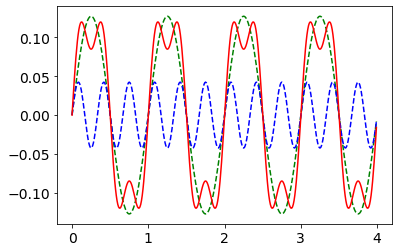

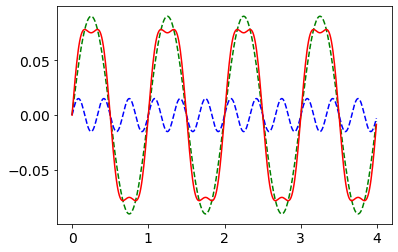

DVgs = 0.08 V
Df = -3388.43 Hz


In [8]:
# en frecuencia la tensión Vgs cuadrada
# entrada del TRAFO
Vgs3k = 4*0.1/np.pi
Vgs9k = 4*0.1/np.pi/3

# Plot
t = np.arange(0,4,0.01)

s1 =  Vgs3k*np.sin(2*np.pi*t)
s3 =  Vgs9k*np.sin(2*np.pi*3*t)
plt.plot(t,s1, 'g--')
plt.plot(t,s3, 'b--')
plt.plot(t,s1+s3, 'r-')
plt.show()

#Secundario TRAFO
Vgs3ks = Vgs3k/2**0.5
Vgs9ks = Vgs9k/10**(6*1.5/20)

s1 =  Vgs3ks*np.sin(2*np.pi*t)
s3 =  Vgs9ks*np.sin(2*np.pi*3*t)
plt.plot(t,s1, 'g--')
plt.plot(t,s3, 'b--')
plt.plot(t,s1+s3, 'r-')
plt.show()

Dvgs = max(s1+s3)


print('DVgs = {:1.2f} V'.format(Dvgs))

Df   = rf*Dvgs/Vgs*fo

print('Df = {:1.2f} Hz'.format(Df))